### Initialization and load the data

In [1]:
pip install nlp

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Projects\Depressio 1.2\myvenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


d:\Projects\Depressio 1.2\myvenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16,6))

    plt.subplot(1,2,1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    


In [4]:
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8,8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0,6)), labels=classes)
    plt.yticks(list(range(0,6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

print('using TensorFlow version', tf.__version__)


using TensorFlow version 2.12.0


### Task 3: Importing data

1. Importing the tweet emotion dataset
2. Create train, validation and test sets
3. Extracting tweets and labels from the examples

In [5]:
dataset = nlp.load_dataset('json', data_files='D:\Projects\Depressio 1.2\Data\data.jsonl')

Using custom data configuration default


In [6]:
dataset

{'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='int64', id=None)}, num_rows: 416809)}

In [7]:
test = nlp.load_dataset('json', data_files='D:\Projects\Depressio 1.2\SetFit_emotion\\test.jsonl')
train = nlp.load_dataset('json', data_files='D:\Projects\Depressio 1.2\SetFit_emotion\\train.jsonl')
val = nlp.load_dataset('json', data_files='D:\Projects\Depressio 1.2\SetFit_emotion\\validation.jsonl')


Using custom data configuration default
Using custom data configuration default
Using custom data configuration default


In [8]:
train

{'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='int64', id=None), 'label_text': Value(dtype='string', id=None)}, num_rows: 16000)}

In [9]:
type(train)

nlp.dataset_dict.DatasetDict

In [10]:
# def get_tweet(train_data):
#     # tweets=[x['text'] for x in data]
#     # labels=[x['label'] for x in data]
#     tweets = train_data["text"]
#     labels_text = train_data['label_text']
#     labels = train_data['label']
#     return tweets, labels

def get_tweet(data):
    texts = [x['text'] for x in data]
    labels = [x['label_text'] for x in data]
    return texts, labels

In [11]:
# train_data = dataset['train']  # Assuming 'train' is the correct split name
# tweets, labels = get_tweet(train_data)
train_data = train['train']  # Assuming 'train' is the correct split name
tweets, labels = get_tweet(train_data)


In [12]:
tweets

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy',
 'ive been feeling a little burdened lately wasnt sure why that was',
 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
 'i feel as confused about life as a teenager or as jaded as a year old man',
 'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
 'i feel romantic too',
 'i feel like i have to make the suffering i m seeing mean something',
 'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter',
 'i think it s the easiest time of year to feel dissatisfied',
 'i feel low energy i m just thirst

In [13]:
labels

['sadness',
 'sadness',
 'anger',
 'love',
 'anger',
 'sadness',
 'surprise',
 'fear',
 'joy',
 'love',
 'sadness',
 'joy',
 'anger',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'sadness',
 'sadness',
 'fear',
 'anger',
 'fear',
 'joy',
 'joy',
 'anger',
 'sadness',
 'sadness',
 'sadness',
 'anger',
 'joy',
 'joy',
 'fear',
 'surprise',
 'anger',
 'joy',
 'joy',
 'joy',
 'joy',
 'anger',
 'joy',
 'joy',
 'joy',
 'joy',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'love',
 'joy',
 'anger',
 'joy',
 'sadness',
 'anger',
 'fear',
 'joy',
 'sadness',
 'sadness',
 'surprise',
 'joy',
 'joy',
 'joy',
 'love',
 'fear',
 'fear',
 'surprise',
 'anger',
 'anger',
 'sadness',
 'love',
 'joy',
 'sadness',
 'sadness',
 'joy',
 'sadness',
 'sadness',
 'sadness',
 'joy',
 'joy',
 'joy',
 'anger',
 'sadness',
 'anger',
 'anger',
 'anger',
 'joy',
 'joy',
 'joy',
 'joy',
 'sadness',
 'fear',
 'love',
 'anger',
 'sadness',
 'anger',
 'love',
 'sadness',
 'joy',
 'joy',
 'sadness',
 'anger',
 'love',
 'joy',
 '

### Tokenizer

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [15]:
tokenizer = Tokenizer(num_words=1000,oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

In [16]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

In [17]:
tweets[4]

'i am feeling grouchy'

### Padding and Truncating Sequences

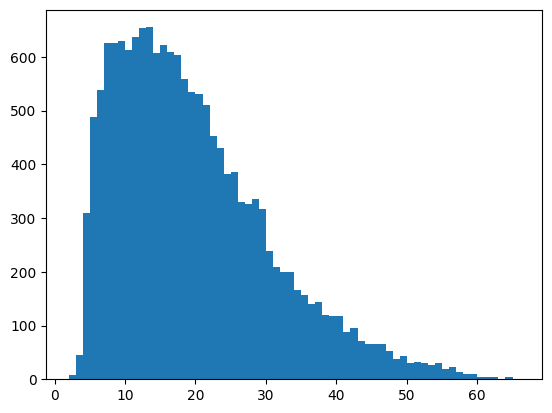

In [18]:
lengths=[len(t.split(" ")) for t in tweets]
plt.hist(lengths,bins=len(set(lengths)))
plt.show()

In [19]:
maxlen= 50

from tensorflow.keras.preprocessing.sequence import pad_sequences


In [20]:
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded= pad_sequences(sequences,truncating='post', padding='post',maxlen= maxlen)
    return padded

In [21]:
padded_train_seq = get_sequences(tokenizer,tweets)

In [22]:
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

### Preparing the Labels

In [23]:
classes = set(labels)
print(classes)

{'joy', 'love', 'anger', 'surprise', 'fear', 'sadness'}


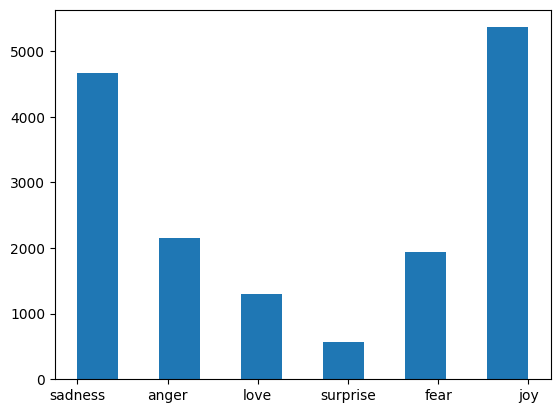

In [24]:
plt.hist(labels, bins=11)
plt.show()

In [25]:
class_to_index = dict((c,i) for i, c in enumerate(classes))
index_to_class = dict((v,k) for k,v in class_to_index.items())

In [26]:
class_to_index

{'joy': 0, 'love': 1, 'anger': 2, 'surprise': 3, 'fear': 4, 'sadness': 5}

In [27]:
index_to_class

{0: 'joy', 1: 'love', 2: 'anger', 3: 'surprise', 4: 'fear', 5: 'sadness'}

In [28]:
names_to_ids=lambda labels:np.array([class_to_index.get(x) for x in labels])

In [29]:
train_labels=names_to_ids(labels)
print(train_labels[4])

2


### Creating the model

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(1000,16,input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6,activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            16000     
                                                                 
 bidirectional (Bidirectiona  (None, 50, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 31,926
Trainable params: 31,926
Non-trainable params: 0
_________________________________________________________________


### Training the Model

In [32]:
val = val['train']

In [33]:
val_tweets, val_labels = get_tweet(val)
val_seq = get_sequences(tokenizer,val_tweets)
val_labels = names_to_ids(val_labels)

In [34]:
val_tweets[1], val_labels[1]

('i feel like i am still looking at a blank canvas blank pieces of paper', 5)

In [35]:
h = model.fit(
    padded_train_seq, train_labels,
    validation_data=(val_seq, val_labels),
    epochs=20,
    callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
)


Epoch 1/20
500/500 [==============================] - 13s 20ms/step - loss: 1.3812 - accuracy: 0.4403 - val_loss: 0.9956 - val_accuracy: 0.5930
Epoch 2/20
500/500 [==============================] - 9s 18ms/step - loss: 0.7284 - accuracy: 0.7299 - val_loss: 0.6461 - val_accuracy: 0.7590
Epoch 3/20
500/500 [==============================] - 9s 18ms/step - loss: 0.5308 - accuracy: 0.8161 - val_loss: 0.5130 - val_accuracy: 0.8185
Epoch 4/20
500/500 [==============================] - 9s 18ms/step - loss: 0.4401 - accuracy: 0.8441 - val_loss: 0.4717 - val_accuracy: 0.8480
Epoch 5/20
500/500 [==============================] - 9s 18ms/step - loss: 0.4036 - accuracy: 0.8562 - val_loss: 0.4645 - val_accuracy: 0.8390
Epoch 6/20
500/500 [==============================] - 9s 18ms/step - loss: 0.3605 - accuracy: 0.8701 - val_loss: 0.4194 - val_accuracy: 0.8585
Epoch 7/20
500/500 [==============================] - 9s 18ms/step - loss: 0.3194 - accuracy: 0.8813 - val_loss: 0.4082 - val_accuracy: 0.862

### Evaluating the Model

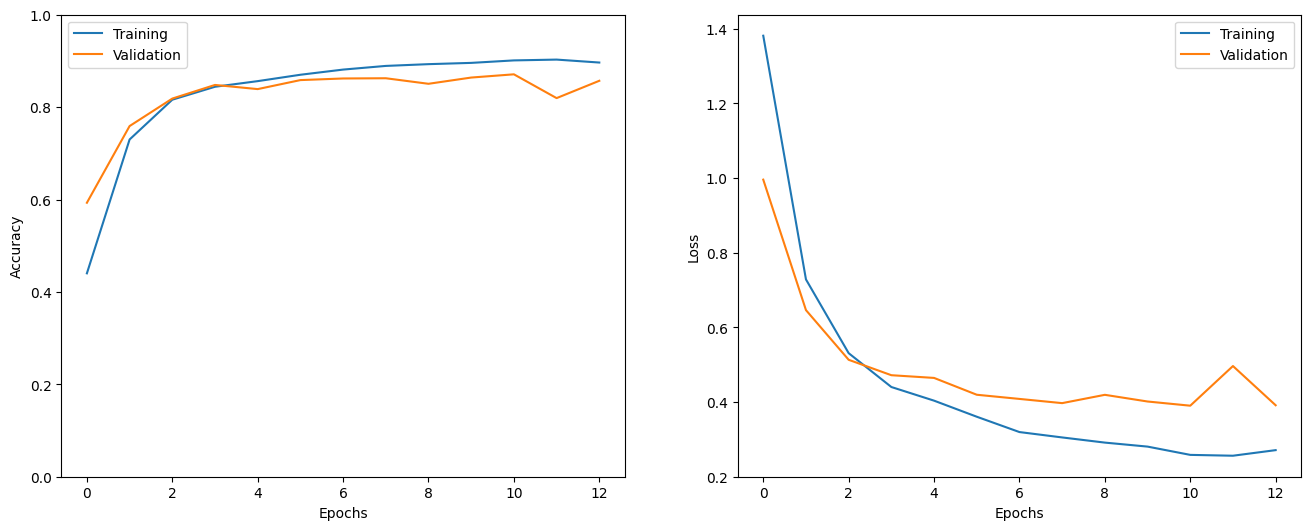

In [36]:
show_history(h)

In [37]:
test = test['train']

In [39]:
test_tweets, test_labels= get_tweet(test)
test_seq=get_sequences(tokenizer, test_tweets)
test_labels=names_to_ids(test_labels)

In [40]:
model.evaluate(test_seq, test_labels)

63/63 [==============================] - 0s 7ms/step - loss: 0.3703 - accuracy: 0.8645


[0.3703080713748932, 0.8644999861717224]

In [41]:
i = random.randint(0, len(test_labels) - 1)
i

153

In [42]:
test_labels

array([5, 5, 5, ..., 0, 0, 4])

In [43]:
np.expand_dims(test_seq[i], axis=0)

array([[  2,   3, 590,   4, 288,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [44]:
i = random.randint(0, len(test_labels) - 1)
print('Sentence:', test_tweets[i])
print('Emotion:', index_to_class[test_labels[i]])
p = model.predict(np.expand_dims(test_seq[i], axis=0))[0]
pred_class = index_to_class[np.argmax(p).astype('uint8')]
print('Predicted Emotion:', pred_class)


Sentence: i know i haven t met most of you in person but i feel so honored to be able to come together with you as we grow closer to god
Emotion: joy
1/1 [==============================] - 1s 872ms/step
Predicted Emotion: joy


custome function evaluation

In [ ]:
# custom_sentence = ["i didnt feel confertable"]
# test_seq=get_sequences(tokenizer, custom_sentence)
# x=np.expand_dims(test_seq[0], axis=0)
# p = model.predict(x)[0]


1/1 [==============================] - 0s 33ms/step


In [ ]:
# pred_class = index_to_class[np.argmax(p).astype('uint8')]
# print('Predicted Emotion:', pred_class)

Predicted Emotion: sadness


In [45]:
preds = model.predict(test_seq)
classes_x = np.argmax(preds, axis=1)


63/63 [==============================] - 0s 6ms/step


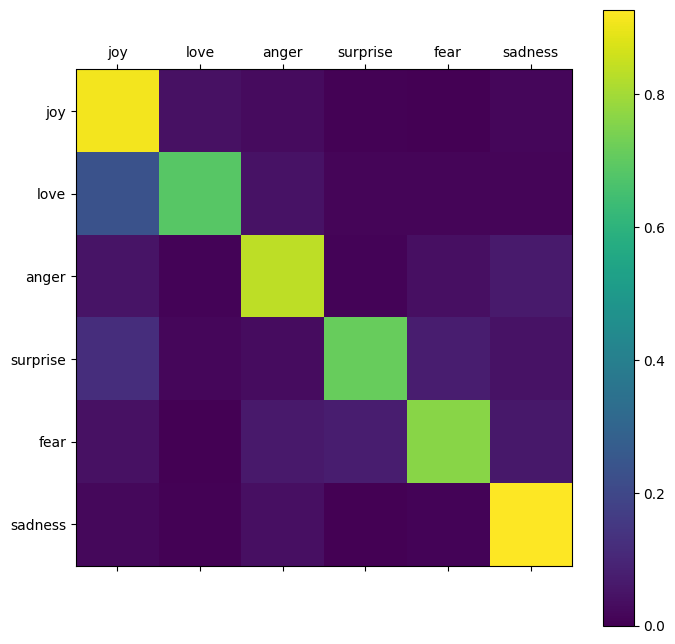

In [46]:
show_confusion_matrix(test_labels,classes_x,list(classes))